In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import community

In [2]:
#G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
g = nx.read_weighted_edgelist("../csv/edges_networkx.csv", delimiter=',', create_using = nx.Graph(), nodetype = int)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 2099
Number of edges: 21887
Average degree:  20.8547


In [3]:
nodes=pd.read_csv('../csv/nodes.csv')
old_nodes_df=nodes[nodes.PY<=2006]
new_nodes=nodes[nodes.PY>2006].index.values
g.remove_nodes_from(new_nodes)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 941
Number of edges: 5430
Average degree:  11.5409


Name: 
Type: Graph
Number of nodes: 931
Number of edges: 5430
Average degree:  11.6649
29


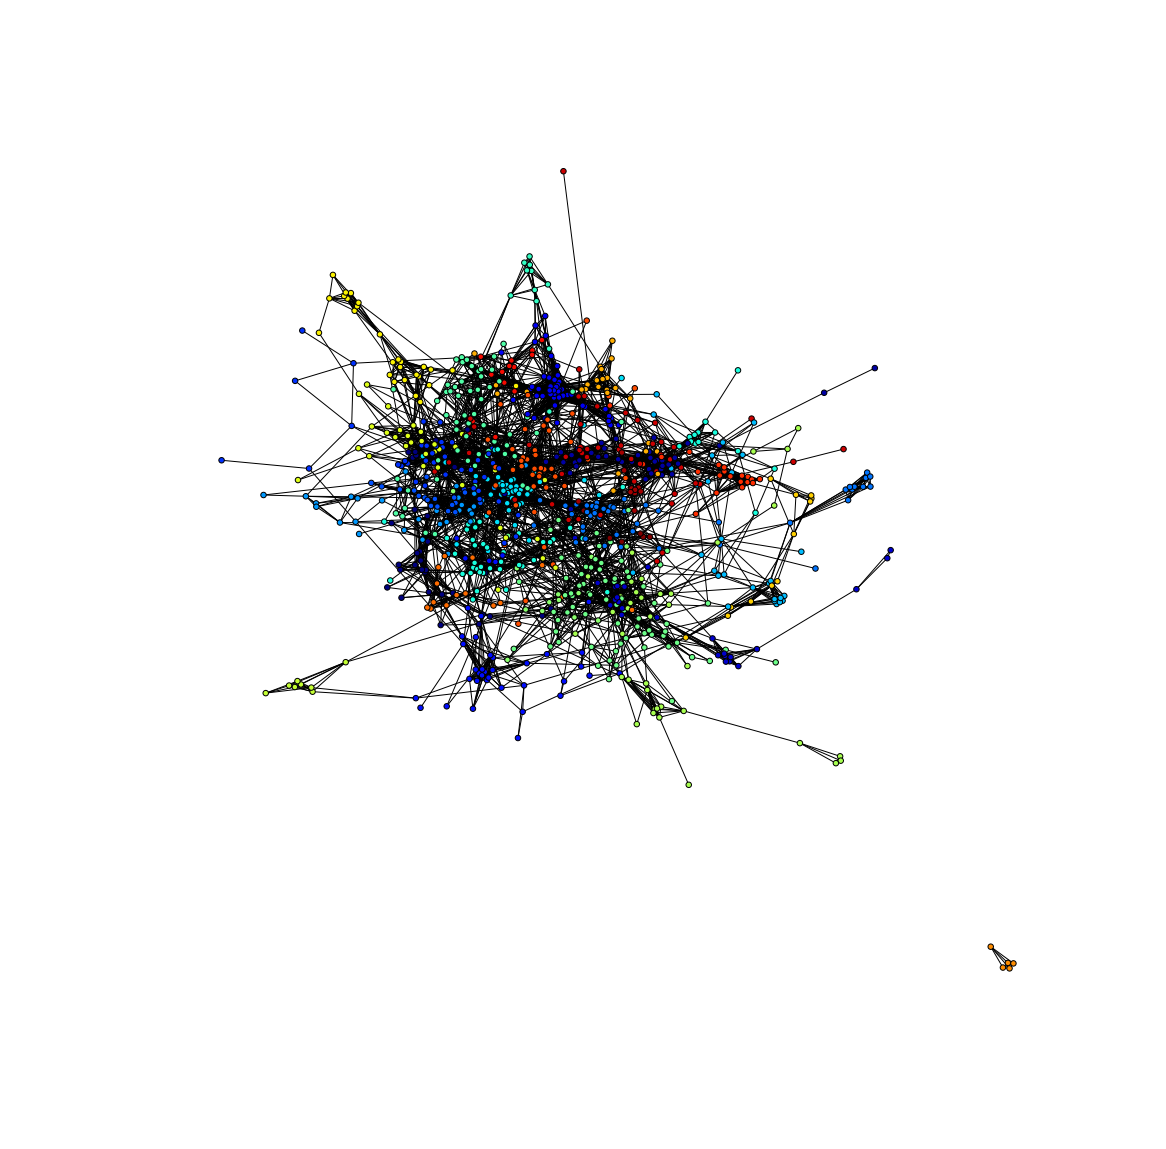

In [49]:
def cluster(g):
    deg = g.degree()
    to_remove = [n for n in deg if deg[n] == 0]
    g.remove_nodes_from(to_remove)
    print nx.info(g)
    spring_pos = nx.spring_layout(g)
    parts = community.best_partition(g)
    community.modularity(parts,g)
    values = [parts.get(node) for node in g.nodes()]
    print max(values)
    plt.figure(figsize=(20,20))
    plt.axis("off")
    nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 30, with_labels = False)
    return(parts)
parts=cluster(g)

In [50]:
#old_nodes_df=nodes
old_nodes_df['cluster']=0
for x in parts:
    old_nodes_df.set_value(x,'cluster',parts[x])
df=old_nodes_df

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [51]:
dg=df[['id','cluster']].groupby('cluster').count()
dg=dg.reset_index(drop=True)
dg.rename(columns={'id':'cluster size'},inplace=True)

In [52]:
df['cluster size']=df.cluster.apply(lambda x: dg.iloc[x])

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
df[df.DE.isnull()].shape

(12, 8)

In [44]:
df['docs']=ds.
docs=df.label

SyntaxError: invalid syntax (<ipython-input-44-16516db357dc>, line 1)

In [ ]:
import re
from nltk import stem
porter = stem.porter.PorterStemmer()
from collections import Counter
docs_cleaned = [[re.sub('[.!,;?()\W\d]+', '', word) for word in doc.lower().split()] for doc in docs]

In [ ]:
stop= open ('stopList.txt').read()
stop_list = set(stop.replace("\n", " ").split())
docs_stemed = [[porter.stem(word) for word in document if word not in stop_list] for document in docs_cleaned]

In [25]:
df['ind']=df.index
df['terms']= docs_stemed

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [27]:
dg['keyword']=''
dg['key terms']=''

for mod in [16]:
    mod_terms=[]
    for terms in df[df.cluster==mod].terms:
        for term in terms:
            mod_terms.append(term)
            
    words = [word for word in mod_terms if word != '']                
    words_counter = Counter(words)
    top_words=[word for word in words_counter.most_common(5) if word[1]>1]
    dg.set_value(mod,'keyword',top_words)
    
    terms = [words[i]+' '+words[i+1] for i in range(len(words)-1)]
    terms_counter= Counter(terms)
    top_terms=[term for term in terms_counter.most_common(5) if term[1]>1]
    dg.set_value(mod,'key terms',top_terms)

In [31]:
docs_stemed

[[u'perceiv', u'qualiti', u'data', u'exchang', u'risk', u'trust', u'intent'],
 [u'understand', u'collabor', u'softwar', u'product', u'design', u'develop'],
 [u'formul', u'dataflow', u'perspect', u'busi', u'process', u'manag'],
 [u'natur',
  u'role',
  u'feedback',
  u'text',
  u'comment',
  u'onlin',
  u'marketplac',
  u'trust',
  u'build',
  u'price',
  u'premium',
  u'seller',
  u'differenti'],
 [u'individu',
  u'cognit',
  u'dualtask',
  u'interfer',
  u'group',
  u'support',
  u'system'],
 [u'recommend', u'consum', u'review', u'evalu', u'websit'],
 [u'enabl', u'customercentr', u'wiki', u'wiki'],
 [u'person',
  u'recommend',
  u'user',
  u'satisfact',
  u'theoret',
  u'synthesi',
  u'empir',
  u'find'],
 [u'onlin', u'consum', u'search', u'depth', u'theori', u'find'],
 [u'design',
  u'web',
  u'site',
  u'custom',
  u'loyalti',
  u'busi',
  u'domain',
  u'multilevel',
  u'analysi'],
 [u'strateg',
  u'align',
  u'busi',
  u'technolog',
  u'knowledgebas',
  u'view',
  u'behavior',
  u'

In [13]:
dg.sort_values('cluster size')

,cluster size,keyword,key terms
22,5,"[(negoti, 6), (support, 2), (analysi, 2)]","[(negoti support, 2)]"
29,6,"[(control, 6), (softwar, 2), (process, 2), (portfolio, 2), (develop, 2)]","[(softwar develop, 2), (portfolio control, 2)]"
17,8,"[(document, 5), (manag, 2)]",[]
28,10,"[(creativ, 9), (idea, 4), (system, 3), (develop, 2), (techniqu, 2)]","[(creativ support, 2), (support system, 2), (idea gener, 2)]"
12,11,"[(privaci, 7), (user, 4), (person, 4), (concern, 3), (model, 3)]","[(web person, 2)]"
20,12,"[(ethic, 6), (piraci, 6), (softwar, 3), (model, 3), (code, 2)]","[(softwar piraci, 3), (piraci price, 2)]"
15,13,"[(network, 15), (analysi, 3), (data, 3), (knowledg, 2), (digit, 2)]","[(analysi data, 2), (electron network, 2), (empir analysi, 2), (network extern, 2)]"
26,13,"[(commun, 12), (electron, 5), (rich, 3), (model, 3), (work, 2)]","[(electron commun, 3), (organiz commun, 2), (electron mail, 2)]"
23,15,"[(system, 6), (explan, 5), (knowledgebas, 5), (expert, 4), (expertsystem, 3)]","[(expert system, 3), (knowledgebas explan, 2), (knowledgebas system, 2), (induct expert, 2), (theoret foundat, 2)]"
6,18,"[(plan, 9), (strateg, 9), (busi, 8), (align, 7), (technolog, 6)]","[(busi technolog, 5), (system plan, 3), (informationsystem plan, 3), (strateg align, 3), (align busi, 3)]"


In [14]:
#dendrogram=community.generate_dendrogram(G_fb)[0]
#dendrogram
#com=community.induced_graph(parts,G_fb)
#nx.draw_networkx(com,cmap = plt.get_cmap("jet"), node_size = 10, with_labels = False)

In [15]:
df.drop('terms',inplace=True, axis=1)

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
df[df.cluster==16].sort('TC',ascending=False)

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id,label,DE,PY,SO,TC,cluster,cluster size,ind
796,796,When online reviews meet hyperdifferentiation: A study of the craft beer industry,differentiation; online reviews; product positioning; product variety; resonance marketing; word of mouth,2006,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,180,16,39,796
1410,1410,Uses and consequences of electronic markets: An empirical investigation in the aircraft parts industry,interorganizational information systems; electronic markets; aircraft parts industry,1998,MIS QUARTERLY,122,16,39,1410
1031,1031,User heterogeneity and its impact on electronic auction market design: An empirical exploration,electronic markets; online auctions; bidding strategies; user behavior taxonomy; smart agents; valuation discovery; calibration; simulation,2004,MIS QUARTERLY,120,16,39,1031
1677,1677,Electronic Integration and Strategic Advantage: A Quasi-Experimental Study in the Insurance Industry,Electronic integration; Strategic advantage; Insurance industry; Electronic interfacing; Quasi-experimental study,1990,INFORMATION SYSTEMS RESEARCH,86,16,39,1677
1433,1433,Reengineering the Dutch flower auctions: A framework for analyzing exchange organizations,electronic markets; transaction costs; reengineering; technology adoption,1998,INFORMATION SYSTEMS RESEARCH,73,16,39,1433
1123,1123,Understanding network effects in software markets: Evidence from Web server pricing,Hedonic pricing; network effects; network externalities; composite goods; two-sided markets; open standards; mindshare; trialability; World Wide Web server market,2002,MIS QUARTERLY,73,16,39,1123
1391,1391,Electronic trading and work transformation in the London Insurance Market,electronic trading; Giddens' social theory; modernity and self-identity; work transformation; London insurance market; globalization,1999,INFORMATION SYSTEMS RESEARCH,71,16,39,1391
1215,1215,New buyers' arrival under dynamic pricing market microstructure: The case of group-buying discounts on the Internet,bidding; dynamic pricing; electronic markets; group-buying discounts; Internet-based selling; market microstructure; online retailing; pricing mechanisms,2001,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,67,16,39,1215
840,840,Internet exchanges for used books: An empirical analysis of product cannibalization and welfare impact,publisher welfare; retailer welfare; consumer surplus; price competition; used-books sales; electronic markets,2006,INFORMATION SYSTEMS RESEARCH,60,16,39,840
1284,1284,Adoption of Internet-based product customization and pricing strategies,adoption of information technology; customization; electronic commerce; flexible manufacturing systems,2000,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,60,16,39,1284
